**SETUP**

In [3]:
!pip install matplotlib
!pip install seaborn

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np

In [4]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

**Loadiing the Dataset**

In [6]:
url = '/content/articles_data.csv'
data = pd.read_csv(url)

data.head()

,Unnamed: 0,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
0,0,reuters,Reuters,Reuters Editorial,NTSB says Autopilot engaged in 2018 California...,The National Transportation Safety Board said ...,https://www.reuters.com/article/us-tesla-crash...,https://s4.reutersmedia.net/resources/r/?m=02&...,2019-09-03T16:22:20Z,WASHINGTON (Reuters) - The National Transporta...,0.0,0.0,0.0,2528.0,0.0
1,1,the-irish-times,The Irish Times,Eoin Burke-Kennedy,Unemployment falls to post-crash low of 5.2%,Latest monthly figures reflect continued growt...,https://www.irishtimes.com/business/economy/un...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T10:32:28Z,The States jobless rate fell to 5.2 per cent l...,0.0,6.0,10.0,2.0,0.0
2,2,the-irish-times,The Irish Times,Deirdre McQuillan,"Louise Kennedy AW2019: Long coats, sparkling t...",Autumn-winter collection features designer’s g...,https://www.irishtimes.com/\t\t\t\t\t\t\t/life...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T14:40:00Z,Louise Kennedy is showing off her autumn-winte...,1.0,NaN,NaN,NaN,NaN
3,3,al-jazeera-english,Al Jazeera English,Al Jazeera,North Korean footballer Han joins Italian gian...,Han is the first North Korean player in the Se...,https://www.aljazeera.com/news/2019/09/north-k...,https://www.aljazeera.com/mritems/Images/2019/...,2019-09-03T17:25:39Z,"Han Kwang Song, the first North Korean footbal...",0.0,0.0,0.0,7.0,0.0
4,4,bbc-news,BBC News,BBC News,UK government lawyer says proroguing parliamen...,"The UK government's lawyer, David Johnston arg...",https://www.bbc.co.uk/news/av/uk-scotland-4956...,https://ichef.bbci.co.uk/news/1024/branded_new...,2019-09-03T14:39:21Z,NaN,0.0,0.0,0.0,0.0,0.0


**Data Handling**

In [16]:
# Selecting relevant features
features = data[['engagement_reaction_count', 'engagement_comment_count', 'engagement_share_count']]
features.fillna(0, inplace=True)  # Handling missing values
data.fillna(0, inplace=True)

<ipython-input-16-6b85c1bbfa96>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(0, inplace=True)  # Handling missing values


**Standardize Features**

In [17]:
# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

**K-Means Clustering Function**

In [19]:
def k_means_clustering(data, k, max_iterations=100):
    np.random.seed(42)  # For reproducibility
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]

    for i in range(max_iterations):
        # Assign clusters
        distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
        closest_cluster = np.argmin(distances, axis=0)

        # Update centroids
        new_centroids = np.array([data[closest_cluster == k].mean(axis=0) for k in range(centroids.shape[0])])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return centroids, closest_cluster

**Elbow Plot**

In [20]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['engagement_reaction_count', 'engagement_comment_count', 'engagement_share_count']])
    sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

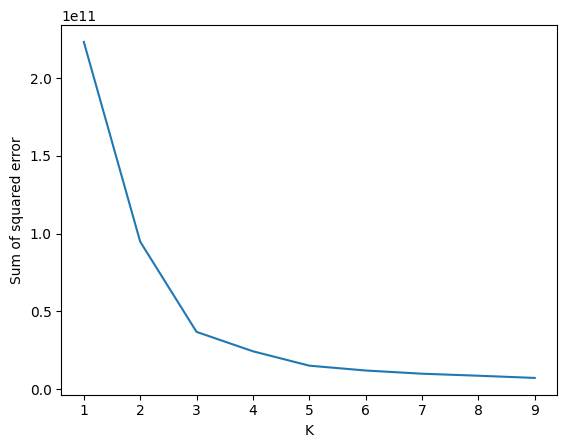

In [21]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

**Applying K-means Clustering**

In [22]:
# Applying K-means clustering
k = 3  # Number of clusters
centroids, clusters = k_means_clustering(features_scaled, k)

**Data Visualizations**

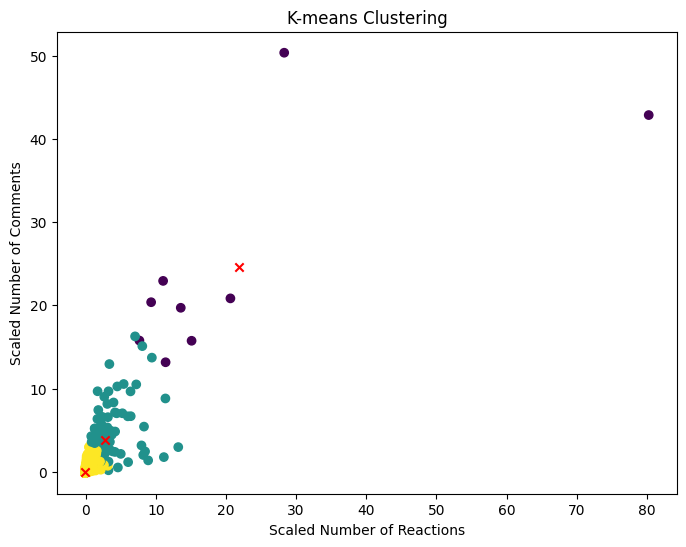

In [23]:
# Plotting (if desired and applicable)
plt.figure(figsize=(8, 6))
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=clusters, cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')  # Centroids
plt.title('K-means Clustering')
plt.xlabel('Scaled Number of Reactions')
plt.ylabel('Scaled Number of Comments')
plt.show()